In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

### Read the training dataset using pandas

In [2]:
data = pd.read_csv('../Dataset/data.csv')

In [3]:
print(data.columns)
data.shape

Index(['index', 'title', 'genre', 'summary'], dtype='object')


(4657, 4)

In [4]:
data.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


<AxesSubplot: >

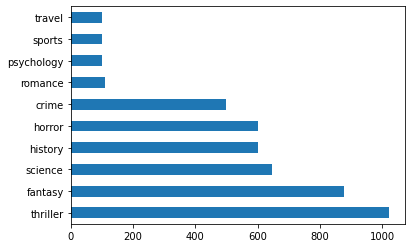

In [5]:
data['genre'].value_counts().plot(kind='barh')

### Data Preprocessing

In [6]:
data['genre_id'] = data['genre'].factorize()[0]

In [7]:
data['genre_id'].value_counts()

5    1023
0     876
1     647
3     600
4     600
2     500
7     111
6     100
8     100
9     100
Name: genre_id, dtype: int64

In [8]:
data['summary'] = data['summary'].apply(lambda x: x.lower())

In [9]:
data.head()

,index,title,genre,summary,genre_id
0,0,Drowned Wednesday,fantasy,drowned wednesday is the first trustee among ...,0
1,1,The Lost Hero,fantasy,"as the book opens, jason awakens on a school ...",0
2,2,The Eyes of the Overworld,fantasy,cugel is easily persuaded by the merchant fia...,0
3,3,Magic's Promise,fantasy,the book opens with herald-mage vanyel return...,0
4,4,Taran Wanderer,fantasy,taran and gurgi have returned to caer dallben...,0


### Use sentence transformer model to convert text to numerical vector representation

In [28]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

def getEmbedding(sentence):
    return model.encode(sentence)

In [ ]:
embeddings = data['summary'].apply(lambda x: getEmbedding1(x))

In [13]:
input_data = []
for item in embeddings:
    input_data.append(item.tolist())


### Using Tfidf vectorizer for comparison with sentence embedding deep learning models

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(data.summary).toarray()
labels = data.genre_id
print("Each of the %d synopsis is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 4657 synopsis is represented by 20152 features (TF-IDF score of unigrams and bigrams)


### Accuracy comparison b/w Tfidf and sentence transformer models

### ** Using text embeddings of Tfidf vectorizer : 

In [18]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df_tfidf = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [19]:
cv_df_tfidf

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.353004
1,RandomForestClassifier,1,0.362661
2,RandomForestClassifier,2,0.365199
3,RandomForestClassifier,3,0.352309
4,RandomForestClassifier,4,0.303974
5,LinearSVC,0,0.701717
6,LinearSVC,1,0.689914
7,LinearSVC,2,0.711063
8,LinearSVC,3,0.718582
9,LinearSVC,4,0.616541


### **Using text embeddings from sentence transform DL model

In [20]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    LogisticRegression(random_state=0)
]
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, input_data, data['genre'].factorize()[0], scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/Users/schaudhary3/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/schaudhary3/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [21]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.524678
1,RandomForestClassifier,1,0.498927
2,RandomForestClassifier,2,0.503759
3,RandomForestClassifier,3,0.502685
4,RandomForestClassifier,4,0.479055
5,LinearSVC,0,0.713519
6,LinearSVC,1,0.688841
7,LinearSVC,2,0.737916
8,LinearSVC,3,0.738990
9,LinearSVC,4,0.654135


### Note : From above comparison we see that all models give better accuracy when text embeddings generated from sentence trasformer are used. So we will be using these embeddings for further model training

### Also LinearSVC gives the best accuracy compared to other models. So lets train our Genre prediction model using LinearSVC 

### Model Training

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
X_train, X_test, y_train, y_test = train_test_split(input_data, 
                                                               labels, 
                                                               test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification report
print('\t\t\t\t\tCLASSIFICATIION METRICS\n')
print(classification_report(y_test, y_pred, 
                                    target_names= data['genre'].unique()))

					CLASSIFICATIION METRICS

              precision    recall  f1-score   support

     fantasy       0.77      0.77      0.77       233
     science       0.74      0.72      0.73       167
       crime       0.66      0.59      0.62       126
     history       0.76      0.77      0.76       145
      horror       0.66      0.59      0.62       132
    thriller       0.67      0.79      0.72       247
  psychology       0.79      0.76      0.78        25
     romance       0.63      0.34      0.44        35
      sports       0.86      0.83      0.85        30
      travel       0.89      1.00      0.94        25

    accuracy                           0.72      1165
   macro avg       0.74      0.72      0.72      1165
weighted avg       0.72      0.72      0.72      1165



In [24]:
genre_id_df = data[['genre', 'genre_id']].drop_duplicates()

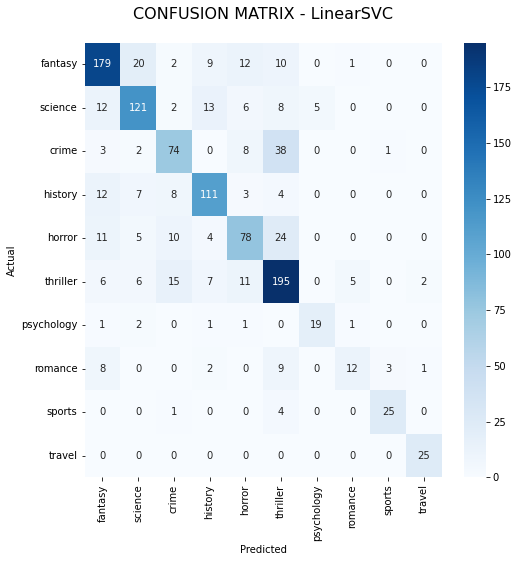

In [25]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=genre_id_df.genre.values, 
            yticklabels=genre_id_df.genre.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

### save embeddings to file

In [11]:
import pickle

In [ ]:
with open('embeddings.pkl', 'wb') as file:
    pickle.dump(embeddings, file)

In [12]:
with open('embeddings.pkl', 'rb') as file:
    embeddings = pickle.load(file)

### Making Prediction

In [29]:
test_summary = "Teenager Max McGrath (Ben Winchell) discovers that his body can generate the most powerful energy in the universe. Steel (Josh Brener) is a funny, slightly rebellious, techno-organic extraterrestrial who wants to utilize Max's skills. When the two meet, they combine together to become Max Steel, a superhero with unmatched strength on Earth. They soon learn to rely on each other when Max Steel must square off against an unstoppable enemy from another galaxy."
test_summary_embed = getEmbedding(test_summary)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(input_data, data['genre'], 
                                                    test_size=0.25,
                                                    random_state = 0)
trained_model = LinearSVC().fit(X_train, y_train)

In [31]:
print(trained_model.predict([test_summary_embed]))

['science']
